In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
from PIL import Image
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/validation'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
happy completed
neutral completed
sad completed
tired completed


In [5]:
print(train)

                              image  label
0          images/train\angry\0.jpg  angry
1          images/train\angry\1.jpg  angry
2         images/train\angry\10.jpg  angry
3      images/train\angry\10002.jpg  angry
4      images/train\angry\10016.jpg  angry
...                             ...    ...
21572  images/train\tired\36381.jpg  tired
21573  images/train\tired\36382.jpg  tired
21574  images/train\tired\36383.jpg  tired
21575  images/train\tired\36384.jpg  tired
21576  images/train\tired\36385.jpg  tired

[21577 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
happy completed
neutral completed
sad completed
tired completed


In [7]:
print(test)
print(test['image'])

                                  image  label
0     images/validation\angry\10052.jpg  angry
1     images/validation\angry\10065.jpg  angry
2     images/validation\angry\10079.jpg  angry
3     images/validation\angry\10095.jpg  angry
4     images/validation\angry\10121.jpg  angry
...                                 ...    ...
6635  images/validation\tired\37881.jpg  tired
6636  images/validation\tired\37882.jpg  tired
6637  images/validation\tired\37883.jpg  tired
6638  images/validation\tired\37884.jpg  tired
6639  images/validation\tired\37885.jpg  tired

[6640 rows x 2 columns]
0       images/validation\angry\10052.jpg
1       images/validation\angry\10065.jpg
2       images/validation\angry\10079.jpg
3       images/validation\angry\10095.jpg
4       images/validation\angry\10121.jpg
                      ...                
6635    images/validation\tired\37881.jpg
6636    images/validation\tired\37882.jpg
6637    images/validation\tired\37883.jpg
6638    images/validation\tired\3

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode="grayscale", target_size=(48, 48))
        img = np.array(img)
        features.append(img)
    print("="*100)
    for i in range(len(features)):
        print(len(features[i])) 
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    print(features) 
    return features
    

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/21577 [00:00<?, ?it/s]

48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
4

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/6640 [00:00<?, ?it/s]

48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
4

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

c:\Users\enzoc\Documents\FRProject\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 168s 976ms/step - accuracy: 0.2875 - loss: 1.4927 - val_accuracy: 0.3417 - val_loss: 1.5897
Epoch 2/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.3633 - loss: 1.3479 - val_accuracy: 0.4703 - val_loss: 1.6691
Epoch 3/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 153s 903ms/step - accuracy: 0.4737 - loss: 1.1603 - val_accuracy: 0.5151 - val_loss: 1.6407
Epoch 4/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 160s 944ms/step - accuracy: 0.5351 - loss: 1.0525 - val_accuracy: 0.6699 - val_loss: 0.8094
Epoch 5/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 157s 927ms/step - accuracy: 0.5718 - loss: 0.9864 - val_accuracy: 0.6437 - val_loss: 0.8852
Epoch 6/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 159s 941ms/step - accuracy: 0.5953 - loss: 0.9584 - val_accuracy: 0.6253 - val_loss: 1.0958
Epoch 7/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 156s 924ms/step - accuracy: 0.6186 - loss: 0.9117 - val_accuracy: 0.6342 - val_loss: 1.0227
Epoch 8/100
 36/169 ━━━━━━━━━━━━━━━━━━━━ 2:10 980ms/step - accuracy: 0.6

KeyboardInterrupt: 

In [20]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [21]:
from keras.models import model_from_json

In [22]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json, None)
model.load_weights("emotiondetector.h5")

In [23]:
label = ['angry','happy','neutral','sad', 'tired']

In [24]:
def ef(image):
    img = load_img(image,grayscale =  True , target_size=(48, 48))
    img = img.resize((48, 48))
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

original image is of tired
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
model prediction is  tired


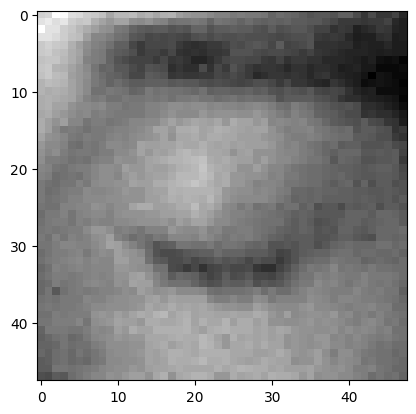

In [29]:
image = 'images/train/tired/35889.jpg'
print("original image is of tired")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
model prediction is  sad


c:\Users\enzoc\Documents\FRProject\.venv\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


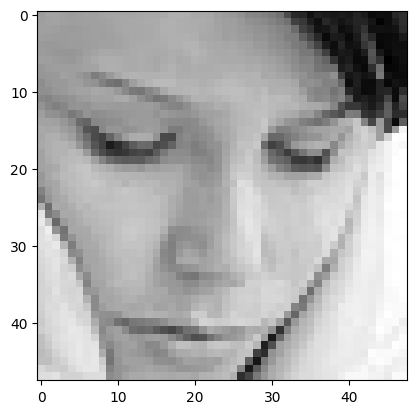

In [28]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')